In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [10]:
mentalhealth_df = pd.read_csv('mental_health_data final data.csv')
mentalhealth_df.drop(columns=['User_ID', 'Country',])
mentalhealth_df['Severity'] = mentalhealth_df['Severity'].fillna('NA')
mentalhealth_df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NA,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NA,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NA,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


In [34]:
mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  50000 non-null  int64  
 1   Age                      50000 non-null  int64  
 2   Gender                   50000 non-null  object 
 3   Occupation               50000 non-null  object 
 4   Country                  50000 non-null  object 
 5   Mental_Health_Condition  50000 non-null  object 
 6   Severity                 50000 non-null  object 
 7   Consultation_History     50000 non-null  object 
 8   Stress_Level             50000 non-null  object 
 9   Sleep_Hours              50000 non-null  float64
 10  Work_Hours               50000 non-null  int64  
 11  Physical_Activity_Hours  50000 non-null  int64  
 12  Social_Media_Usage       50000 non-null  float64
 13  Diet_Quality             50000 non-null  object 
 14  Smoking_Habit         

In [69]:
feature = mentalhealth_df.drop(columns=['User_ID','Gender', 'Age','Occupation', 'Country', 'Consultation_History', 'Stress_Level', 'Medication_Usage', 'Mental_Health_Condition'])
target = mentalhealth_df['Stress_Level']

In [70]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(feature)
encoded_target = encoder.fit_transform(target.values.reshape(-1, 1))
print(encoded_data)

[[ 3. 36. 16. ...  1.  3.  2.]
 [ 1. 28. 44. ...  2.  0.  3.]
 [ 3. 31. 47. ...  1.  0.  3.]
 ...
 [ 1. 12. 31. ...  0.  1.  0.]
 [ 1. 42. 29. ...  1.  2.  2.]
 [ 1. 38.  6. ...  2.  1.  3.]]


In [71]:
X = encoded_data
y = encoded_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)
dt_pred = dt_grid.predict(X_test)
print('Decision Tree', accuracy_score(y_test, dt_pred))

Decision Tree 0.3375


Text(792.3131313131312, 0.5, 'Actual')

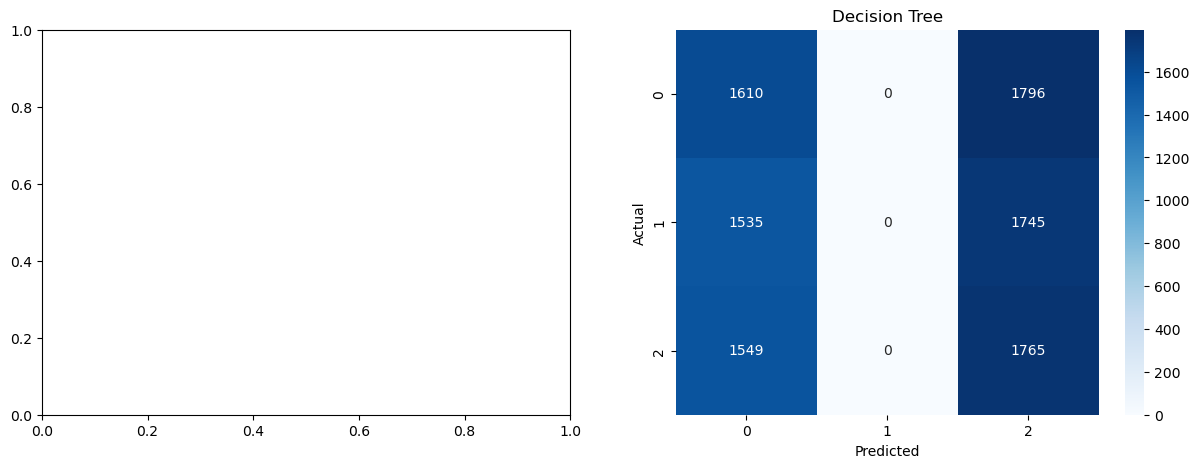

In [73]:
dt_cm = confusion_matrix(y_test, dt_pred)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')